In [1]:
#Importamos las librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
#Leemos la base
flight = pd.read_csv('flights.csv', 
                     dtype={'YEAR': 'int', 
                           'MONTH': 'int',
                            'DAY': 'int',
                            'DAY_OF_WEEK': 'int',
                            'FLIGHT_NUMBER': 'int',
                            'SCHEDULED_DEPARTURE': 'int',
                            'AIRLINE': 'str',
                            'ORIGIN_AIRPORT': 'str',
                            'DESTINATION_AIRPORT': 'str'                    
                           })

In [3]:
#Visualizamos la base
flight.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Conocemos la información de las variables
flight.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [5]:
#Revisamos el porcentaje de Nulos que hay en la base
flight.isnull().sum()/len(flight)*100

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

In [6]:
#Hay columnas que no son utiles ni necesarias para el propósto que tenemos con el Dataset
flight=flight.drop(['YEAR','FLIGHT_NUMBER','TAIL_NUMBER','CANCELLATION_REASON',
                    'AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis=1)

In [7]:
#Revisamoa nuevamente que las variables no tengan más del 80% de los datos Nulos
flight.isnull().sum()/len(flight)*100

MONTH                  0.000000
DAY                    0.000000
DAY_OF_WEEK            0.000000
AIRLINE                0.000000
ORIGIN_AIRPORT         0.000000
DESTINATION_AIRPORT    0.000000
SCHEDULED_DEPARTURE    0.000000
DEPARTURE_TIME         1.480526
DEPARTURE_DELAY        1.480526
TAXI_OUT               1.530259
WHEELS_OFF             1.530259
SCHEDULED_TIME         0.000103
ELAPSED_TIME           1.805629
AIR_TIME               1.805629
DISTANCE               0.000000
WHEELS_ON              1.589822
TAXI_IN                1.589822
SCHEDULED_ARRIVAL      0.000000
ARRIVAL_TIME           1.589822
ARRIVAL_DELAY          1.805629
DIVERTED               0.000000
CANCELLED              0.000000
dtype: float64

In [8]:
# Eliminar las filas donde al menos un dato sea nulo
flight = flight.dropna() 

In [9]:
flight.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,21.0,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,1,1,4,AA,LAX,PBI,10,2.0,-8.0,12.0,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,1,1,4,US,SFO,CLT,20,18.0,-2.0,16.0,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,1,1,4,AA,LAX,MIA,20,15.0,-5.0,15.0,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,1,1,4,AS,SEA,ANC,25,24.0,-1.0,11.0,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


In [10]:
flight.isnull().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [11]:
flight.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED'],
      dtype='object')

In [12]:
#Eliminamos el Target para el análisis de la correlación
arrival_delay = flight['ARRIVAL_DELAY']
flight = flight.drop(['ARRIVAL_DELAY'],
                     axis=1
                    )

In [13]:
flight.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DIVERTED,CANCELLED
0,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,21.0,...,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,0,0
1,1,1,4,AA,LAX,PBI,10,2.0,-8.0,12.0,...,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,0,0
2,1,1,4,US,SFO,CLT,20,18.0,-2.0,16.0,...,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,0,0
3,1,1,4,AA,LAX,MIA,20,15.0,-5.0,15.0,...,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,0,0
4,1,1,4,AS,SEA,ANC,25,24.0,-1.0,11.0,...,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,0,0


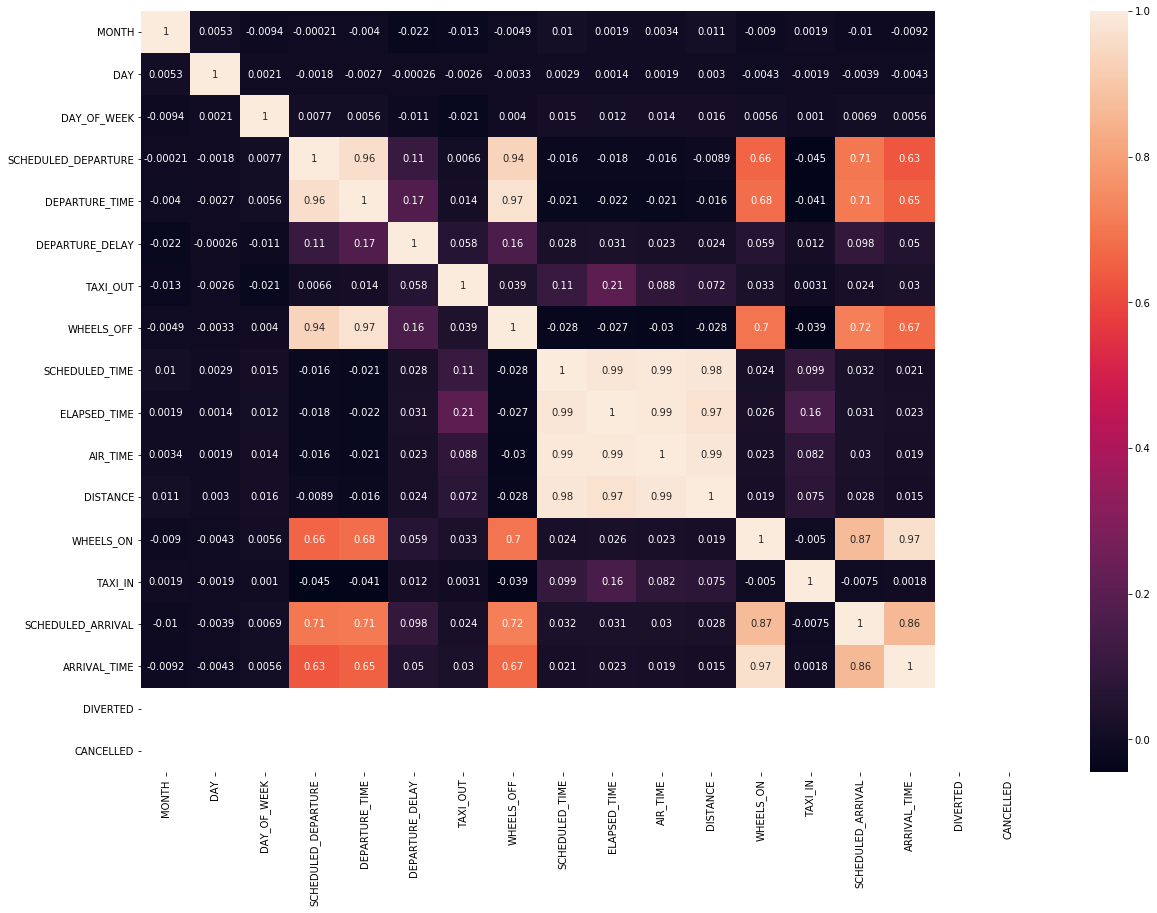

In [14]:
axis = plt.subplots(figsize=(20, 14))
sns.heatmap(flight.corr(), annot = True)
plt.show()

In [15]:
flight = flight.drop(
    ['WHEELS_OFF', 'SCHEDULED_DEPARTURE','WHEELS_ON', 'SCHEDULED_TIME', 
     'ELAPSED_TIME', 'AIR_TIME','ARRIVAL_TIME', 'DEPARTURE_TIME'], 
    axis=1)

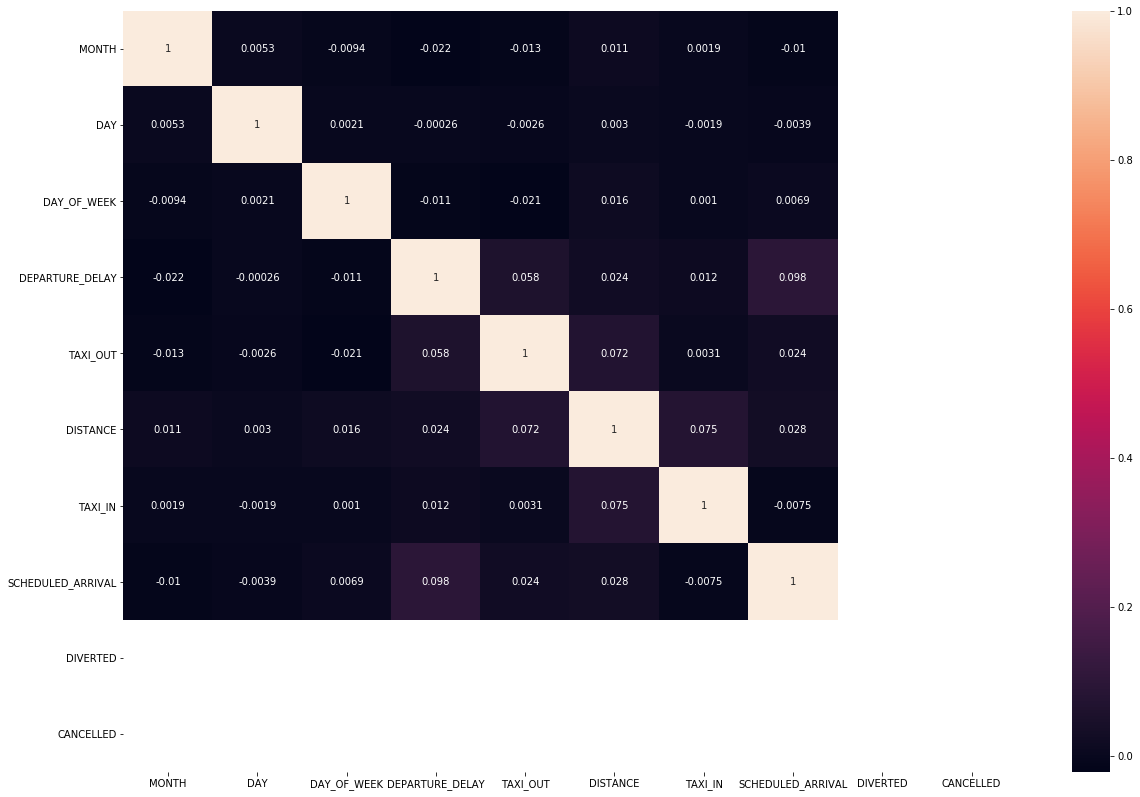

In [16]:
axis = plt.subplots(figsize=(20, 14))
sns.heatmap(flight.corr(), annot = True)
plt.show()

In [17]:
### Codificacion de variables categoricas
vbls_encode = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
encoder = LabelEncoder()

flight_encoder = flight.copy()

flight_category = flight[vbls_encode].apply(encoder.fit_transform)

flight_encoder = flight_encoder.drop(vbls_encode, axis=1).join(flight_category)
flight_encoder.head()

,MONTH,DAY,DAY_OF_WEEK,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,TAXI_IN,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,1,1,4,-11.0,21.0,1448,4.0,430,0,0,1,323,584
1,1,1,4,-8.0,12.0,2330,4.0,750,0,0,0,482,542
2,1,1,4,-2.0,16.0,2296,11.0,806,0,0,11,584,373
3,1,1,4,-5.0,15.0,2342,8.0,805,0,0,0,482,510
4,1,1,4,-1.0,11.0,1448,5.0,320,0,0,1,583,324


In [18]:
# Particion de datos de entrenamiento y prueba
train_set, test_set, train_set_target, test_set_target = train_test_split(flight_encoder, arrival_delay, test_size=0.3, random_state=24)

In [19]:
test_set.shape

(1714203, 13)

In [20]:
test_set_target.shape

(1714203,)

In [21]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=1, n_jobs=-1)
forest_reg.fit(train_set,train_set_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:
accuracy = forest_reg.score(test_set, test_set_target)
# Prints the model accuracy
print('{0:.1%} test set accuracy'.format(accuracy))

89.4% test set accuracy


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_set_target,(forest_reg.predict(train_set)).round())

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [24]:
confusion_matrix(test_set_target,(forest_reg.predict(test_set)).round())

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

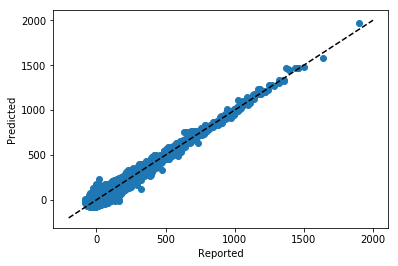

In [47]:
pred = forest_reg.predict(test_set)

# Plot predicted MPG without error bars
plt.scatter(test_set_target, pred)
plt.plot([-200, 2000], [-200, 2000], 'k--')
plt.xlabel('Reported')
plt.ylabel('Predicted')
plt.show()

In [95]:

lista = []
for i in range(0, len(test_set_target)):
    lista.append(abs(test_set_target.iloc[i] - pred[i]))


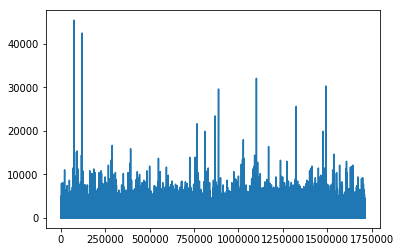

In [91]:
plt.plot(lista )

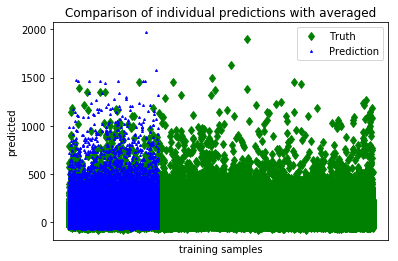

In [49]:
plt.figure()
plt.plot(test_set_target, 'gd', label='Truth')
plt.plot(forest_reg.predict(test_set), 'b^', label='Prediction', markersize=2)
#plt.plot(reg3.predict(xt), 'ys', label='LinearRegression')
#plt.plot(ereg.predict(xt), 'r*', label='VotingRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()

In [52]:
predictions = list()
for t in range(len(test_set)):
    yhat = forest_reg.predict(test_set[t])
    obs = test_set[t]
    predictions.append(yhat)

error = mean_squared_error(test_set, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test_set)
pyplot.plot(predictions, color='red')
pyplot.show()

KeyError: 0

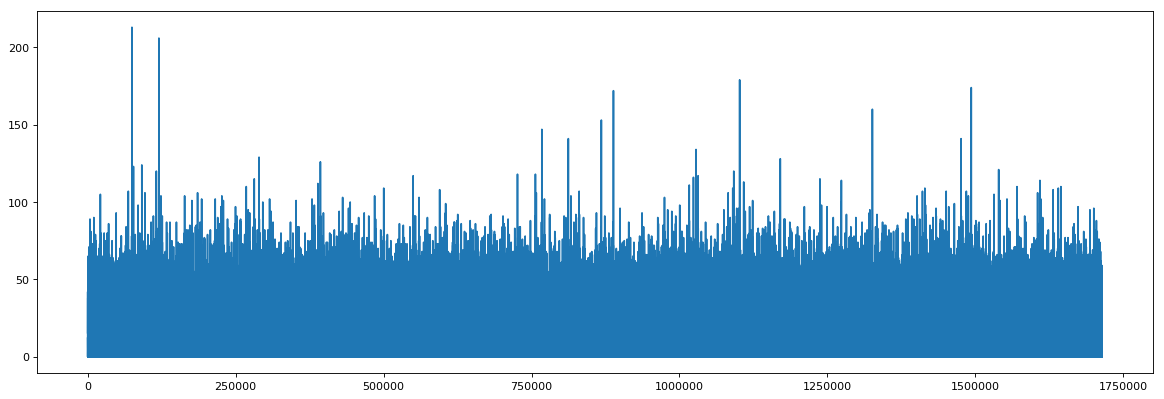

In [96]:
from matplotlib.pyplot import figure 
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(lista)